In [68]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)

In [69]:
db = pd.read_csv('healthcare-dataset-stroke-data.csv')
db.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [70]:
db.shape

(5110, 12)

In [71]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [72]:
db.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Filling Null Values

In [73]:
db['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [74]:
db['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [75]:
db['bmi'].fillna(db['bmi'].mean(), inplace=True)

In [76]:
db.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [77]:
#mean values has not change only the values which are null are filled with mean
db['bmi'].describe()  

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [78]:
db['bmi'].value_counts()

28.893237    201
28.700000     41
28.400000     38
27.600000     37
26.700000     37
            ... 
11.500000      1
40.600000      1
53.900000      1
97.600000      1
14.900000      1
Name: bmi, Length: 419, dtype: int64

In [79]:
# droping columns which are of no use
db.drop('id', axis=1, inplace=True)

In [80]:
db.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Outlier Removal

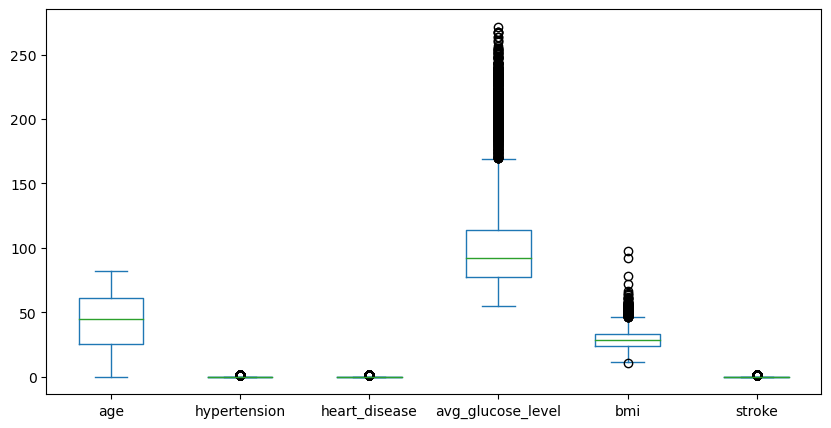

In [81]:
db.plot(kind='box')
plt.show()

### Lable Encoding

In [82]:
db

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [83]:
db['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [84]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [85]:
Gender = enc.fit_transform(db['gender'])
Gender

array([1, 0, 1, ..., 0, 1, 0])

In [86]:
Ever_Married = enc.fit_transform(db['ever_married'])
Ever_Married

array([1, 1, 1, ..., 1, 1, 1])

In [87]:
Work_Type = enc.fit_transform(db['work_type'])
Work_Type

array([2, 3, 2, ..., 3, 2, 0])

In [88]:
Residence_Type = enc.fit_transform(db['Residence_type'])
Residence_Type

array([1, 0, 0, ..., 0, 0, 1])

In [89]:
Smoking_Status = enc.fit_transform(db['smoking_status'])
Smoking_Status

array([1, 2, 2, ..., 2, 1, 0])

In [90]:
db['gender'] = Gender
db['ever_married'] = Ever_Married
db['work_type'] = Work_Type
db['Residence_type'] = Residence_Type
db['smoking_status'] = Smoking_Status

In [91]:
db.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [92]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


### Partitioning

In [93]:
# splitting the data for train and test
X = db.drop('stroke', axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [94]:
y = db['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=None)

In [96]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4524,0,56.0,0,0,1,2,1,144.33,29.2,2
4571,0,40.0,0,0,1,2,1,72.99,46.4,0
1580,1,25.0,0,0,1,2,0,119.96,27.7,2
2051,0,35.0,0,0,1,2,0,74.55,22.4,2
4220,1,38.0,0,0,1,2,1,167.16,18.3,2


In [97]:
y_train.head()

4524    0
4571    0
1580    0
2051    0
4220    0
Name: stroke, dtype: int64

### Normalization

In [98]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [99]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [111]:
import pickle
import os

In [112]:
# Scalar Object to be save as a file
scaler_path = os.path.join('C:/Users/Dell/Desktop/Stroke Prediction/', 'Models/scaler.pkl')
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(std, scaler_file)

In [113]:
X_train_std

array([[-0.83358205,  0.56766989, -0.32520982, ...,  0.84758786,
         0.0454044 ,  0.58252331],
       [-0.83358205, -0.1416469 , -0.32520982, ..., -0.73038061,
         2.29890145, -1.2837426 ],
       [ 1.19964195, -0.8066314 , -0.32520982, ...,  0.30854817,
        -0.15112151,  0.58252331],
       ...,
       [ 1.19964195, -0.1416469 , -0.32520982, ..., -0.12719586,
        -0.37385087, -1.2837426 ],
       [-0.83358205,  0.2130115 , -0.32520982, ..., -0.6695534 ,
        -0.00700251,  1.51565627],
       [ 1.19964195, -0.1859792 , -0.32520982, ...,  0.33862999,
        -0.26903705,  0.58252331]])

# Training Data

### 1. Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [115]:
dt.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [116]:
dt.feature_importances_

array([0.02510569, 0.19460582, 0.03383727, 0.01957917, 0.01630105,
       0.02256023, 0.02125452, 0.35106913, 0.27131202, 0.0443751 ])

In [117]:
y_pred = dt.predict(X_test_std)

In [118]:
y_test

1581    0
10      1
1085    0
3151    0
324     0
       ..
3009    0
159     1
1554    0
2115    0
4317    0
Name: stroke, Length: 1022, dtype: int64

In [119]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1581,0,44.0,0,0,1,2,0,70.58,25.1,2
10,0,81.0,1,0,1,2,0,80.43,29.7,2
1085,0,50.0,0,0,1,3,1,121.14,22.8,2
3151,0,56.0,0,0,1,0,1,112.62,24.8,2
324,1,27.0,0,0,0,0,1,95.10,24.3,1
...,...,...,...,...,...,...,...,...,...,...
3009,0,7.0,0,0,0,4,0,74.96,18.8,0
159,0,81.0,1,0,1,3,0,74.02,25.0,2
1554,0,22.0,1,0,0,2,1,71.22,40.0,2
2115,0,49.0,0,0,1,2,0,114.76,24.7,2


In [120]:
from sklearn.metrics import accuracy_score

In [121]:
ac_dt = accuracy_score(y_test, y_pred)
ac_dt

0.9041095890410958

### 2. Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [123]:
lr.fit(X_train_std, y_train)

LogisticRegression()

In [124]:
y_pred_lr = lr.predict(X_test_std)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
ac_lr = accuracy_score(y_test, y_pred_lr)
ac_lr

0.9383561643835616

In [145]:
import joblib
model_path = os.path.join('C:/Users/Dell/Desktop/Stroke Prediction/', 'Models/lr.sav')
joblib.dump(lr, model_path)

['C:/Users/Dell/Desktop/Stroke Prediction/Models/lr.sav']

### 3. K-Nearest Neighbors (KNN)

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [127]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [128]:
y_pred = knn.predict(X_test_std)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
ac_knn = accuracy_score(y_test, y_pred)
ac_knn

0.9383561643835616

In [130]:
ac_lr # Linear Regression still has higgest accuracy score

0.9383561643835616

In [131]:
ac_dt

0.9041095890410958

### 4. Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [133]:
rf.fit(X_train_std, y_train)

RandomForestClassifier()

In [134]:
y_pred = rf.predict(X_test_std)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [135]:
ac_rf = accuracy_score(y_test, y_pred)
ac_rf

0.9354207436399217

In [136]:
ac_knn

0.9383561643835616

In [137]:
ac_lr # Linear Regression still has higgest accuracy score

0.9383561643835616

In [138]:
ac_dt

0.9041095890410958

### 5. Support Vector Machines (SVM)

In [139]:
from sklearn.svm import SVC
sv = SVC()

In [140]:
sv.fit(X_train_std, y_train )

SVC()

In [141]:
y_pred = sv.predict(X_test_std)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [142]:
ac_sv = accuracy_score(y_test, y_pred)
ac_sv # it's accuracy is as same as Logistic Regression

0.9383561643835616

In [143]:
ac_lr # it's accuracy is as same as SVM

0.9383561643835616

### 6. Linear Regression

### 7. Naive Bayes

### 8. K-Means

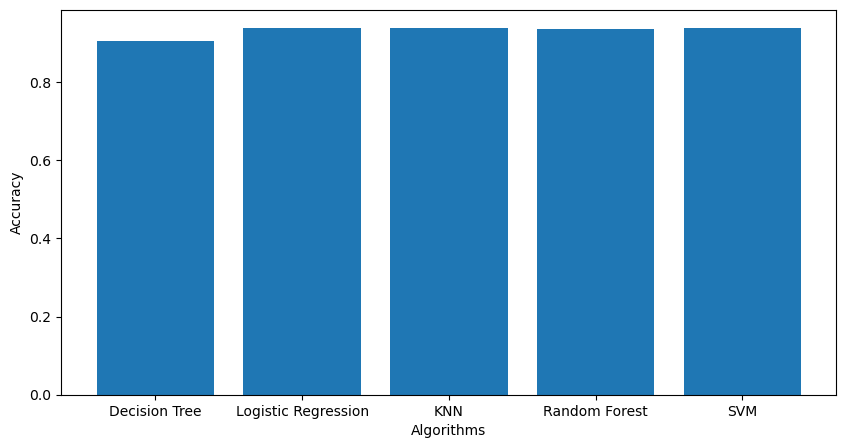

In [144]:
plt.bar(['Decision Tree', 'Logistic Regression', 'KNN', 'Random Forest', 'SVM'], [ac_dt, ac_lr, ac_knn, ac_rf, ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()